In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [18]:
data=pd.read_csv("../data/raw_analyst_ratings.csv/raw_analyst_ratings.csv")
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [19]:
print(f"Dataset shape: {data.shape}")
print("\nFirst 5 rows:")
print(data.head())
print("\nData types and missing values:")
print(data.info())
print(data.describe())

Dataset shape: (1407328, 6)

First 5 rows:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-

The dataset contains a total of 1,407,328 entries across six columns. The first five rows include various headlines related to stock market movements, along with their corresponding URLs, publishers, dates, and the relevant stock symbol. All columns are filled without any missing values, indicating a complete dataset. The data types include one integer column and five object columns, primarily consisting of strings.

The column titled "Unnamed: 0" serves as an index and has a mean value of 707,245.4 and a standard deviation of 408,100.9. The minimum value is 0, while the maximum reaches 1,413,848. This summary provides a comprehensive view of the dataset's structure and contents.

In [20]:
data.describe()

,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06



Publisher distribution:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
Matthew Ely               1
Frank Ochoa               1
Jeremie Capron            1
Marvin Dumont             1
Igor Gonta                1
Name: count, Length: 1034, dtype: int64


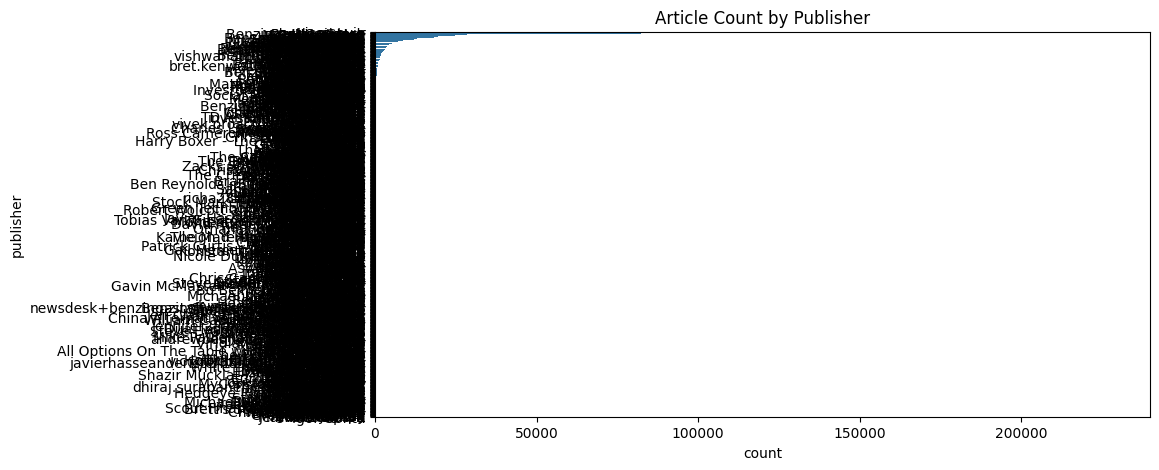

In [22]:
# Publisher distribution
df=data
publisher_counts = df['publisher'].value_counts()
print("\nPublisher distribution:")
print(publisher_counts)

plt.figure(figsize=(10,5))
sn.countplot(y='publisher', data=df, order=publisher_counts.index)
plt.title('Article Count by Publisher')
plt.show()

0   2020-06-05 10:30:54-04:00
1   2020-06-03 10:45:20-04:00
2   2020-05-26 04:30:07-04:00
3   2020-05-22 12:45:06-04:00
4   2020-05-22 11:38:59-04:00
Name: date, dtype: datetime64[ns, UTC-04:00]


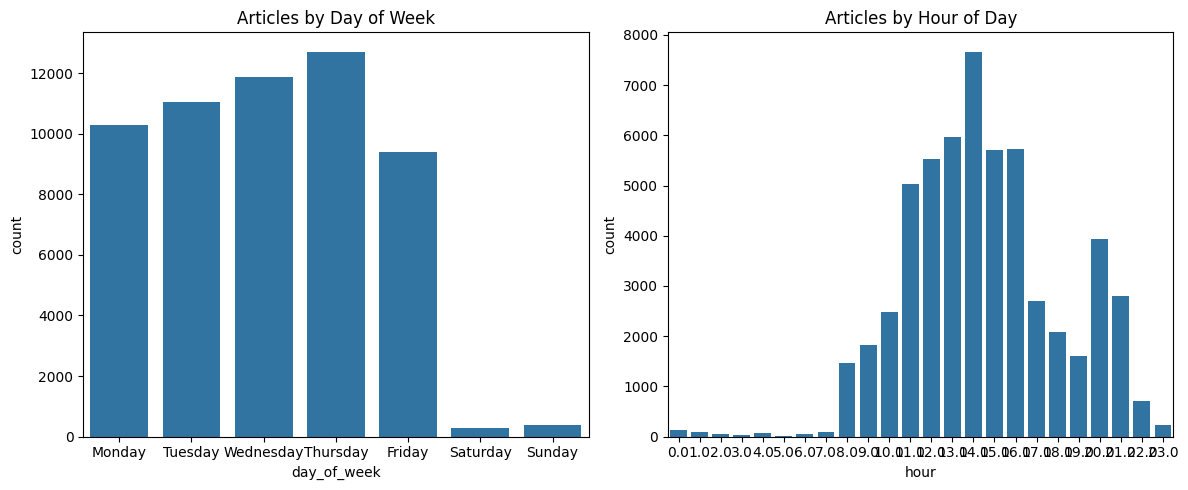

In [28]:
# Check the first few entries in your date column
print(df['date'].head())

# Temporal analysis
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Coerce errors to NaT

# Convert to UTC if not already aware
if df['date'].dt.tz is None:
    df['date'] = df['date'].dt.tz_localize('UTC', ambiguous='NaT', nonexistent='NaT')
else:
    df['date'] = df['date'].dt.tz_convert('UTC')

# Extract temporal features
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()

# Plotting
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sn.countplot(x='day_of_week', data=df, 
             order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Articles by Day of Week')

plt.subplot(1,2,2)
sn.countplot(x='hour', data=df)
plt.title('Articles by Hour of Day')
plt.tight_layout()
plt.show()